![](images/EscUpmPolit_p.gif "UPM")

# Kaggle Challenge
## Loan Approval Prediction - New York
El reto consiste en aplicar algoritmos de Machine Learning para predecir la emisión de créditos a un cliente en función de un dataset de entrada para el entrenamiento correspondiente.

El dataset está formado por los siguientes campos:

- id # Text # Identifier of the data instance
- LoanNr_ChkDgt # Text # Identifier of the loan petition
- Name # Text # Borrower name
- City # Text # Borrower city
- State # Text # Borrower state
- Bank # Text # Bank name
- BankState # Text # Bank state
- ApprovalDate # Date/Time # Date SBA commitment issued
- ApprovalFY # Text # Fiscal year of commitment
- NoEmp # Number # Number of business employees
- NewExist # Text # 1 = Existing business, 2 = New business
- CreateJob # Number # Number of jobs created
- RetainedJob # Number # Number of jobs retained
- FranchiseCode # Text # Franchise code, (00000 or 00001) = No franchise
- UrbanRural # Text # 1 = Urban, 2 = rural, 0 = undefined
- RevLineCr # Text # Revolving line of credit: Y = Yes, N = No
- LowDoc # Text # LowDoc Loan Program: Y = Yes, N = No
- DisbursementDate # Date/Time # Disbursement date
- DisbursementGross # Currency # Amount disbursed
- BalanceGross # Currency # Gross amount outstanding
- Accept # Text # Loan approval status. 0 = not approved, 1 = approved


## 1º Paso: Importar datos

In [186]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame

# Training and test spliting
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

# Estimators
from sklearn.svm import SVC

# Evaluation
from sklearn import metrics
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.naive_bayes import BernoulliNB, ComplementNB, MultinomialNB
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

# Optimization
from sklearn.model_selection import GridSearchCV

# Visualisation
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(color_codes=True)

train = pd.read_csv('data_reto_1/train.csv')
test = pd.read_csv('data_reto_1/test_nolabel.csv')
original_data = pd.concat([data, test])

C:\Users\Usuario\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3165: DtypeWarning: Columns (8) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [188]:
print(data.shape)
print(test.shape)
print(original_data.shape)
original_data.iloc[40385:,:]

(40385, 21)
(7050, 20)
(47435, 21)


,id,LoanNr_ChkDgt,Name,City,State,Bank,BankState,ApprovalDate,ApprovalFY,NoEmp,...,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,BalanceGross,Accept
0,63ef5dfc62f,1787644007,ERIC P. HAILE,STAFFORD,NY,MANUFACTURERS & TRADERS TR CO,NY,16-Jan-98,1998,1,...,0,0,1,0,N,Y,3-Apr-98,"$35,000.00",$0.00,NaN
1,65ee0569c05,6209123009,"TANNING BED, LTD.",WEST SENECA,NY,MANUFACTURERS & TRADERS TR CO,NY,9-Feb-94,1994,81,...,0,0,1,0,N,N,31-Jul-94,"$145,000.00",$0.00,NaN
2,19058f4da52,5033174010,BREITO COMPUTER SOLUTIONS INC,WOOD HAVEN (WOODHAVEN),NY,BANK OF AMERICA NATL ASSOC,RI,7-Nov-01,2002,4,...,1,5,1,1,Y,N,31-Dec-01,"$52,174.00",$0.00,NaN
3,a0f1299afe4,1578685008,Rasol Food Corporation,BRONX,NY,JPMORGAN CHASE BANK NATL ASSOC,IL,13-Dec-05,2006,6,...,3,6,0,1,Y,N,31-Jan-06,"$194,316.00",$0.00,NaN
4,e47da0be9fc,7146054004,MCKAY ARCHITECTURE AND DESIGN,NEW YORK,NY,FLUSHING BANK,NY,30-Jan-04,2004,3,...,0,3,1,1,Y,N,29-Feb-04,"$75,000.00",$0.00,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,78c2f0067d8,5583904009,NASCO STONEWORKS INC,HUNTINGTON STATION (HUNTINGTON,NY,BANK OF AMERICA NATL ASSOC,RI,2-Aug-02,2002,2,...,0,2,1,1,0,N,31-Oct-02,"$30,000.00",$0.00,NaN
7046,279c7d23eb7,3264695007,"Yaworski's, Inc.",ROME,NY,FIRST NIAGARA BANK NATL ASSOC,NY,14-Nov-08,2009,5,...,0,5,0,1,N,N,31-Dec-08,$18.00,$0.00,NaN
7047,d67af0ec109,1890735004,RAWSON VALLEY FARMS LANDSCAPES,WALWORTH,NY,CITIZENS BANK NATL ASSOC,RI,23-Jun-06,2006,1,...,0,1,0,2,Y,N,31-Aug-06,"$23,762.00",$0.00,NaN
7048,7d2e8114e9a,8939464003,RAJ REALTY PA LLC,BROOKLYN,NY,FIRST NIAGARA BANK NATL ASSOC,NY,20-Jun-05,2005,2,...,0,2,1,1,Y,N,31-Mar-08,"$30,000.00",$0.00,NaN


In [189]:
original_data[['id', 'NoEmp', 'NewExist']]

,id,NoEmp,NewExist
0,b353a0b461c,20,1.0
1,cca24bbcc48,3,1.0
2,e60644381ce,5,1.0
3,ffca41a2760,25,1.0
4,79e48255003,6,1.0
...,...,...,...
7045,78c2f0067d8,2,1.0
7046,279c7d23eb7,5,2.0
7047,d67af0ec109,1,1.0
7048,7d2e8114e9a,2,1.0


De acuerdo a los datos mostrados, se puede intuir que las variables asociadas a la prediccion del riesgo son:
- ApprovalDate y DisbursementDate, ambas determinan la fecha en que la SBA ha aceptado la solicitud y la fecha en que ha concedido el préstamo.
- NoEmp, la cantidad de empleados puede determinar que tan grande o pequeña es la empresa.
- NewExist, si es una empresa que recién esta empezando su actividad podría afectar la concesión del préstamo.
- CreateJob, si se han creado fuentes de empleo puede ser un indicador del crecimiento de la empresa.
- RetainedJob, representa la cantidad de empleos a tiempo completo existentes al momento de hacer la solicitud y que se mantendrán en caso de conseguir la aprobación.
- FranchiseCode ??
- RevLineCr, representa el hecho de que tan pronto como se pague la deuda, la empresa puede volver a pedir prestado hasta su límite de crédito sin pasar por otro proceso de aprobación de préstamo.
- LowDoc, de ser verdadero significa que el SBA promete un procesamiento rápido (para montos inferiores a $150,000).
- DisbursementGross, la cantidad que se esta solicitando es importante en conjunto con el resto de parámetros para poder determinar la aprobación del préstamo.
- Accept, el campo más importante porque indica si se ha cedido o no el préstamo.

##  2º Paso: Limpieza de datos

Se eliminarán campos irrelevantes o no necesarios. Para esto se debe analizar los datos numéricos, revisar si hay datos faltantes o nulos y completarlos, y eliminar columnas no necesarias. Luego hacer lo mismo con los no numéricos e incluso cambiar el tipo de dato si así se considera.

In [190]:
#Dataframe information from each column
original_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47435 entries, 0 to 7049
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 47435 non-null  object 
 1   LoanNr_ChkDgt      47435 non-null  int64  
 2   Name               47431 non-null  object 
 3   City               47435 non-null  object 
 4   State              47435 non-null  object 
 5   Bank               47382 non-null  object 
 6   BankState          47380 non-null  object 
 7   ApprovalDate       47435 non-null  object 
 8   ApprovalFY         47435 non-null  object 
 9   NoEmp              47435 non-null  int64  
 10  NewExist           47427 non-null  float64
 11  CreateJob          47435 non-null  int64  
 12  RetainedJob        47435 non-null  int64  
 13  FranchiseCode      47435 non-null  int64  
 14  UrbanRural         47435 non-null  int64  
 15  RevLineCr          47288 non-null  object 
 16  LowDoc             4737

In [191]:
#Let's see if there's any duplicate
original_data.duplicated().any()

False

In [192]:
#statistics from numeric columns
original_data.describe()

,LoanNr_ChkDgt,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,Accept
count,4.743500e+04,47435.000000,47427.000000,47435.000000,47435.000000,47435.000000,47435.000000,40385.000000
mean,4.419227e+09,9.223548,1.277353,3.843027,6.730895,1208.474881,0.780879,0.796360
std,2.535700e+09,51.034541,0.450420,140.256254,140.456054,8592.654575,0.583581,0.402709
min,1.000655e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.255044e+09,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,3.716385e+09,4.000000,1.000000,0.000000,2.000000,1.000000,1.000000,1.000000
75%,6.356859e+09,8.000000,2.000000,1.000000,5.000000,1.000000,1.000000,1.000000
max,9.995413e+09,9999.000000,2.000000,8800.000000,8800.000000,91110.000000,2.000000,1.000000


In [193]:
#and null or missing values
original_data.isnull().sum()

id                      0
LoanNr_ChkDgt           0
Name                    4
City                    0
State                   0
Bank                   53
BankState              55
ApprovalDate            0
ApprovalFY              0
NoEmp                   0
NewExist                8
CreateJob               0
RetainedJob             0
FranchiseCode           0
UrbanRural              0
RevLineCr             147
LowDoc                 59
DisbursementDate      165
DisbursementGross       0
BalanceGross            0
Accept               7050
dtype: int64

In [194]:
#Fill the missing numeric values with the most repeated
df = original_data.copy()
df.groupby('NewExist').size()

NewExist
0.0       58
1.0    34157
2.0    13212
dtype: int64

In [195]:
df['NewExist'] = df['NewExist'].fillna(1.0)
df['NewExist'].isnull().any()

False

Se elimina la columna LoanNr_ChkDgt porque es un identificador de la solicitud del préstamo y no aporta información relevante para determinar el riesgo.


In [196]:
df.drop(['LoanNr_ChkDgt'], axis=1, inplace=True)

Al revisar los datos no numéricos, se considera que las siguientes columnas no son consideradas como relevantes al momento de determinar el riesgo ya que aportan solamente información complementaria de la solicitud:
- Name
- City
- State
- Bank
- BankState
- ApprovalFY

Así mismo, para RevLineCr y LowDoc se va a reemplazar los nulos por el valor que más se repita.

In [197]:
df.drop(['Name', 'City', 'State', 'Bank', 'BankState', 'ApprovalFY'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47435 entries, 0 to 7049
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 47435 non-null  object 
 1   ApprovalDate       47435 non-null  object 
 2   NoEmp              47435 non-null  int64  
 3   NewExist           47435 non-null  float64
 4   CreateJob          47435 non-null  int64  
 5   RetainedJob        47435 non-null  int64  
 6   FranchiseCode      47435 non-null  int64  
 7   UrbanRural         47435 non-null  int64  
 8   RevLineCr          47288 non-null  object 
 9   LowDoc             47376 non-null  object 
 10  DisbursementDate   47270 non-null  object 
 11  DisbursementGross  47435 non-null  object 
 12  BalanceGross       47435 non-null  object 
 13  Accept             40385 non-null  float64
dtypes: float64(2), int64(5), object(7)
memory usage: 5.4+ MB


In [198]:
df.groupby('LowDoc').size()

LowDoc
0       13
A       13
C       16
N    43131
R        2
S       11
Y     4190
dtype: int64

In [199]:
df['LowDoc'].fillna('N', inplace=True)
df['LowDoc'].isnull().any()

False

In [200]:
df.groupby('RevLineCr').size()

RevLineCr
0    10051
N    20383
T      955
Y    15899
dtype: int64

In [201]:
df['RevLineCr'].fillna('N', inplace=True)
df['RevLineCr'].isnull().any()

False

In [202]:
#Let's see the column BalanceGross because it seems that it's not as relevant as it was thought
df.groupby('BalanceGross').size()

BalanceGross
$0.00     47435
dtype: int64

In [203]:
#So, let's drop it
df.drop(['BalanceGross'], axis=1, inplace=True)

Luego, convertimos el tipo de dato como se muestra a continuación:
- id, object -> string
- ApprovalDate y DisbursementDate, object -> string
- NewExists, float64 -> int64
- RevLineCr, object -> int64
- LowDoc, object -> int64
- DisbursementGross, object -> float64

In [204]:
df['id'] = df['id'].astype(str)

df['ApprovalDate'] = df['ApprovalDate'].astype(str)

df['DisbursementDate'] = df['DisbursementDate'].astype(str)

df.loc[df["RevLineCr"] == "N", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "0", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "T", "RevLineCr"] = 0
df.loc[df["RevLineCr"] == "Y", "RevLineCr"] = 1
df['RevLineCr'] = df['RevLineCr'].astype(np.int64)

df.loc[df["LowDoc"] == "N", "LowDoc"] = 0
df.loc[df["LowDoc"] == "0", "LowDoc"] = 0
df.loc[df["LowDoc"] == "A", "LowDoc"] = 0
df.loc[df["LowDoc"] == "C", "LowDoc"] = 0
df.loc[df["LowDoc"] == "R", "LowDoc"] = 0
df.loc[df["LowDoc"] == "S", "LowDoc"] = 0
df.loc[df["LowDoc"] == "Y", "LowDoc"] = 0
df['LowDoc'] = df['LowDoc'].astype(np.int64)

df["DisbursementGross"] = df["DisbursementGross"].astype(str)
df["DisbursementGross"] = df["DisbursementGross"].apply(lambda x: x[1:])
df["DisbursementGross"] = df["DisbursementGross"].apply(lambda s: s.strip())
df["DisbursementGross"] = df["DisbursementGross"].replace({',':''}, regex=True)
df.loc[df["DisbursementGross"] == "", "DisbursementGross"] = 0
df["DisbursementGross"] = df["DisbursementGross"].astype(float)

In [205]:
df.info()
df.isnull().any()
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 47435 entries, 0 to 7049
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 47435 non-null  object 
 1   ApprovalDate       47435 non-null  object 
 2   NoEmp              47435 non-null  int64  
 3   NewExist           47435 non-null  float64
 4   CreateJob          47435 non-null  int64  
 5   RetainedJob        47435 non-null  int64  
 6   FranchiseCode      47435 non-null  int64  
 7   UrbanRural         47435 non-null  int64  
 8   RevLineCr          47435 non-null  int64  
 9   LowDoc             47435 non-null  int64  
 10  DisbursementDate   47435 non-null  object 
 11  DisbursementGross  47435 non-null  float64
 12  Accept             40385 non-null  float64
dtypes: float64(3), int64(7), object(3)
memory usage: 5.1+ MB


,id,ApprovalDate,NoEmp,NewExist,CreateJob,RetainedJob,FranchiseCode,UrbanRural,RevLineCr,LowDoc,DisbursementDate,DisbursementGross,Accept
0,b353a0b461c,21-Dec-88,20,1.0,0,0,0,0,0,0,30-Apr-89,350000.0,1.0
1,cca24bbcc48,23-Mar-07,3,1.0,1,4,0,2,0,0,30-Apr-07,35000.0,1.0
2,e60644381ce,9-Jan-03,5,1.0,0,5,1,1,0,0,31-Jan-03,50000.0,1.0
3,ffca41a2760,10-Nov-93,25,1.0,0,0,1,0,0,0,31-Jan-94,190000.0,1.0
4,79e48255003,14-Aug-03,6,1.0,0,0,1,1,0,0,30-Sep-03,30000.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7045,78c2f0067d8,2-Aug-02,2,1.0,0,2,1,1,0,0,31-Oct-02,30000.0,NaN
7046,279c7d23eb7,14-Nov-08,5,2.0,0,5,0,1,0,0,31-Dec-08,18.0,NaN
7047,d67af0ec109,23-Jun-06,1,1.0,0,1,0,2,1,0,31-Aug-06,23762.0,NaN
7048,7d2e8114e9a,20-Jun-05,2,1.0,0,2,1,1,1,0,31-Mar-08,30000.0,NaN


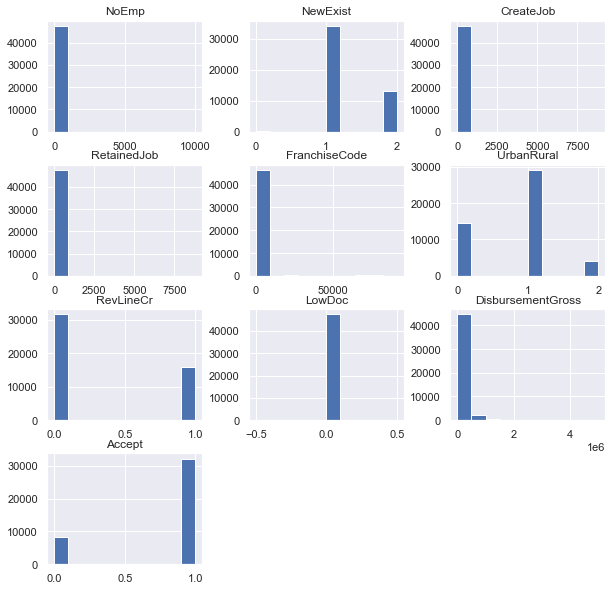

In [206]:
%matplotlib inline
df.hist(figsize=(10,10))
plt.show()

# 3º Paso: Algoritmo ML
El algoritmo secreto es Bernoulli Naive Bayes

## Train and test splitting

In [222]:
# Features of the model
features = ['NoEmp', 'NewExist', 'CreateJob', 'RetainedJob', 'FranchiseCode', 'UrbanRural', 'RevLineCr','LowDoc','DisbursementGross']
# Transform dataframe in numpy arrays and split
train_data = df.iloc[:40385,:]
X_train = train_data[features].values
y_train = train_data['Accept'].values

test_data = df.iloc[40385:,:]
ids = test_data['id'].values
X_test = test_data[features].values

sample_submission = pd.read_csv('data_reto_1/sample_submission.csv')
y_test = sample_submission['Accept'].values

#ids_train, ids_test, X_train, X_test, y_train, y_test = train_test_split(ids, X, y, test_size=7050, random_state=33)

## Define model

In [261]:
alpha = 0.01
binarize = 0.0
fit_prior = False
class_prior = None
model = BernoulliNB(alpha=alpha, binarize=binarize, fit_prior=fit_prior, class_prior=class_prior)

## Train and evaluate

In [262]:
#This step will take some time

model.fit(X_train, y_train)

predicted = model.predict(X_test)
expected = y_test

In [263]:
# Accuracy
metrics.accuracy_score(expected, predicted)

0.4998581560283688

In [264]:
# Count number of samples per class
s_y_test = Series(y_test)
s_y_test.value_counts()

1    3575
0    3475
dtype: int64

In [265]:
# Confusion matrix
print(metrics.confusion_matrix(expected, predicted))

[[2121 1354]
 [2172 1403]]


In [266]:
# Report
print(classification_report(expected, predicted))

              precision    recall  f1-score   support

           0       0.49      0.61      0.55      3475
           1       0.51      0.39      0.44      3575

    accuracy                           0.50      7050
   macro avg       0.50      0.50      0.49      7050
weighted avg       0.50      0.50      0.49      7050



## 4º Paso: Entrega

In [267]:
submission = pd.DataFrame(predicted.astype(int), index=ids, columns=['Accept'])
submission.index.name="id"
submission.to_csv(r'C:\Users\Usuario\OneDrive - Universidad Politécnica de Madrid\Clases\2 Cuatrimestre\ABID\KaggleChallenge\notebook\submission.csv', index=True)

In [216]:
len(ids)

7050